In [1]:
# importo las librerias a utilizar
import pandas as pd
import numpy as np
import geopandas as gpd
import librerias.funciones as fu
import seaborn as sns
#from scipy import spatial
import matplotlib.pyplot as plt
#from shapely import wkt
pd.options.mode.chained_assignment = None

In [2]:
# 1 Levanto los datos de properratti
data_location = "./data/properatti.csv"
dataP = pd.read_csv(data_location, sep=",")
dataP.head(2)

,Unnamed: 0,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat-lon,lat,...,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url,description,title,image_thumbnail
0,0,sell,PH,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,"-34.6618237,-58.5088387",-34.661824,...,40.0,1127.272727,1550.0,NaN,NaN,NaN,http://www.properati.com.ar/15bo8_venta_ph_mat...,"2 AMBIENTES TIPO CASA PLANTA BAJA POR PASILLO,...",2 AMB TIPO CASA SIN EXPENSAS EN PB,https://thumbs4.properati.com/8/BluUYiHJLhgIIK...
1,1,sell,apartment,La Plata,|Argentina|Bs.As. G.B.A. Zona Sur|La Plata|,Argentina,Bs.As. G.B.A. Zona Sur,3432039.0,"-34.9038831,-57.9643295",-34.903883,...,NaN,NaN,NaN,NaN,NaN,NaN,http://www.properati.com.ar/15bob_venta_depart...,Venta de departamento en décimo piso al frente...,VENTA Depto 2 dorm. a estrenar 7 e/ 36 y 37 ...,https://thumbs4.properati.com/7/ikpVBu2ztHA7jv...


**Tipo de columnas**

In [3]:
# Analizo los tipos de columnas
dataP.dtypes

Unnamed: 0                      int64
operation                      object
property_type                  object
place_name                     object
place_with_parent_names        object
country_name                   object
state_name                     object
geonames_id                   float64
lat-lon                        object
lat                           float64
lon                           float64
price                         float64
currency                       object
price_aprox_local_currency    float64
price_aprox_usd               float64
surface_total_in_m2           float64
surface_covered_in_m2         float64
price_usd_per_m2              float64
price_per_m2                  float64
floor                         float64
rooms                         float64
expenses                      float64
properati_url                  object
description                    object
title                          object
image_thumbnail                object
dtype: objec

**Porcentaje de nulos del dataset**

In [4]:
nulos = dataP.isnull().sum() / dataP.shape[0]
nulos

Unnamed: 0                    0.000000
operation                     0.000000
property_type                 0.000000
place_name                    0.000190
place_with_parent_names       0.000000
country_name                  0.000000
state_name                    0.000000
geonames_id                   0.154405
lat-lon                       0.425260
lat                           0.425260
lon                           0.425260
price                         0.168372
currency                      0.168380
price_aprox_local_currency    0.168372
price_aprox_usd               0.168372
surface_total_in_m2           0.324435
surface_covered_in_m2         0.164222
price_usd_per_m2              0.433947
price_per_m2                  0.276869
floor                         0.934837
rooms                         0.609058
expenses                      0.882346
properati_url                 0.000000
description                   0.000016
title                         0.000000
image_thumbnail          

**Análisis de los datos de las difrentes provincias comprendidas en el dataset**

In [5]:
#2 Reviso las diferentes provincias con datos
dataP.state_name.value_counts()

Capital Federal                 32316
Bs.As. G.B.A. Zona Norte        25560
Bs.As. G.B.A. Zona Sur          13952
Córdoba                         12069
Santa Fe                        10172
Buenos Aires Costa Atlántica    10006
Bs.As. G.B.A. Zona Oeste         9322
Buenos Aires Interior            2291
Río Negro                         808
Neuquén                           733
Mendoza                           681
Tucumán                           674
Corrientes                        583
Misiones                          464
Entre Ríos                        369
Salta                             278
Chubut                            259
San Luis                          252
La Pampa                          157
Formosa                            65
Chaco                              57
San Juan                           40
Tierra Del Fuego                   31
Catamarca                          27
Jujuy                              26
Santa Cruz                         20
La Rioja    

**Eliminacion de nulos**

In [6]:
# Evaluacion de registros nulos 
dataPeval=dataP.loc[:,['state_name','price','currency','price_aprox_local_currency','price_aprox_usd',\
                                   'surface_total_in_m2', 'surface_covered_in_m2', 'price_usd_per_m2', 'price_per_m2']]

dataPsN=dataP.dropna(how='all', subset=('price','currency','price_aprox_local_currency','price_aprox_usd',\
                                   'surface_total_in_m2', 'surface_covered_in_m2', 'price_usd_per_m2',\
                                  'price_per_m2'))
#porcentaje de casos sin nulos respecto del total
print ("Porcentaje de casos sin nulos respecto del total")
print((dataPsN.state_name.value_counts()/dataP.state_name.value_counts()).sort_values(ascending=False))

Porcentaje de casos sin nulos respecto del total
Santiago Del Estero             1.000000
Santa Cruz                      1.000000
Formosa                         1.000000
Tierra Del Fuego                1.000000
Catamarca                       1.000000
Capital Federal                 0.993130
Bs.As. G.B.A. Zona Norte        0.992606
Bs.As. G.B.A. Zona Oeste        0.976722
Buenos Aires Costa Atlántica    0.976614
Misiones                        0.971983
Corrientes                      0.963979
San Luis                        0.960317
Buenos Aires Interior           0.958533
Córdoba                         0.948380
Bs.As. G.B.A. Zona Sur          0.947964
Chubut                          0.907336
Entre Ríos                      0.888889
Tucumán                         0.866469
Santa Fe                        0.854404
Neuquén                         0.791269
Mendoza                         0.785609
Río Negro                       0.773515
Chaco                           0.754386
La Pampa

**Eliminacion de Duplicados**

In [7]:
# a)Se eliminan registros duplicados 
dataPsNd = dataPsN.drop_duplicates( keep="first")
# luego de eliminar duplicados se observa que algunos registros continuan duplicandose, existen propiedades repetidas para distintos barrios (lat y lon estan bien pero place_name no)


In [8]:
# b) se verifica que eliminando duplicados sin considerar place_name se reduce mas el universo
dataPsNu = dataPsNd.drop_duplicates( keep="first", subset=('price', 'currency', 'price_aprox_local_currency',
       'price_aprox_usd', 'surface_total_in_m2', 'surface_covered_in_m2',
       'price_usd_per_m2', 'price_per_m2'))

In [9]:
print ("Dataset inicial size              ", dataP.size)
print ("Dataset sin nulos size            ",dataPsN.size )
print ("Dataset sin duplicados size  a)   ",dataPsNd.size )
print ("Dataset sin duplicados size  b)   ",dataPsNu.size)

Dataset inicial size               3151720
Dataset sin nulos size             3028662
Dataset sin duplicados size  a)    3028662
Dataset sin duplicados size  b)    1873690


In [10]:
# Armamos un nuevo dataset para graficar los nulos que hay por cada provincia. Comprobando graficamente que CABA es de las provincias con menos nulos en las variables clave
catNulos = fu.nulosPorAgrupacion(dataPsNu, 'state_name')
df = pd.DataFrame(catNulos)
df1 = df[1].apply(lambda x: x if x is np.NaN else x.transpose())
df = df.join(df1)
df = df.rename(columns={0:'Provincia'})
df.drop([1, 'Unnamed: 0', 'operation', 'property_type', 'place_name', 'place_with_parent_names', 'country_name', \
         'state_name', 'geonames_id', 'lat-lon', 'floor', 'rooms', 'expenses', 'properati_url', 'title', \
        'image_thumbnail'], axis=1, inplace=True)

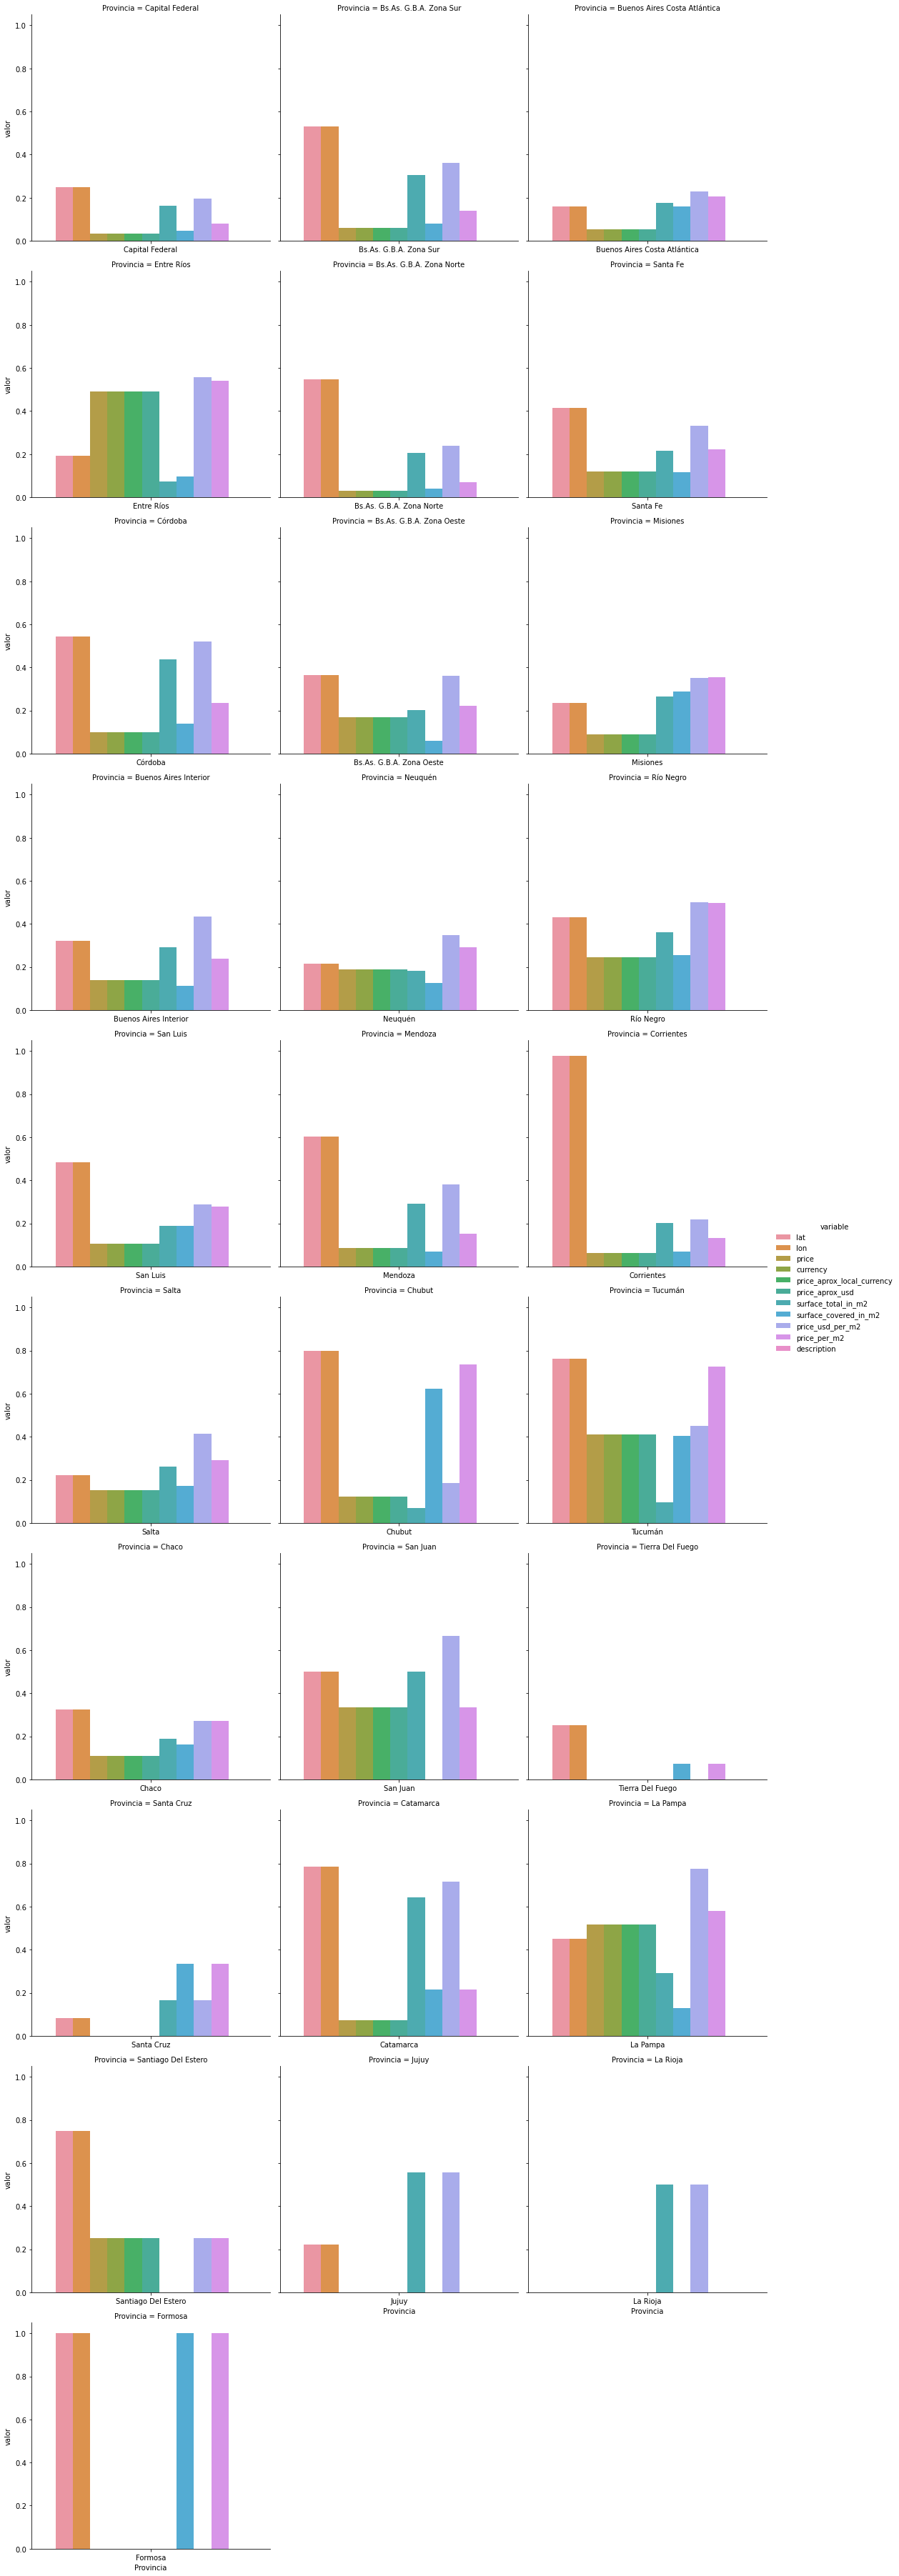

In [11]:
data = df.set_index(['Provincia']).stack().reset_index(name="valor").rename(columns={"level_1": "variable"})
sns.catplot(col="Provincia", x="Provincia", hue="variable",
    y="valor", sharex=False, legend_out=True,
    kind="bar",  data=data, col_wrap=3)

**Determinación del Universo**

**Armado del subset con el que vamos a trabajar de acuerdo a lo analizado hasta el momento**

In [12]:
# Resumo el dataset propiedades en Capital Federal

maskCaba = dataPsNu.state_name == 'Capital Federal' 
dataP_caba = dataPsNu.loc[maskCaba]
## los que dicen en place_name capital federal y no tienen lat y long no corresponden a cap fed
## para los que tienen lat y log se verificara a que barrio pertenecen PENDIENTE
maskBarrio = ((dataP_caba.place_name == 'Capital Federal') & (dataP_caba.lat.isnull()) & (dataP_caba.lon.isnull()))

print('Casos CABA               ',dataP_caba.shape[0])
print('Casos a eliminar del ds  ',maskBarrio.sum()) # 695 ---casos a eliminar
#genero los indices a eliminar
sin_barrio= dataP_caba.loc[maskBarrio,:].index
sin_barrio
#dropeo las 695 filas 
dataP_caba.drop(index=sin_barrio, inplace=True)
print('Casos caba resultantes   ',dataP_caba.shape)

Casos CABA                22029
Casos a eliminar del ds   528
Casos caba resultantes    (21501, 26)


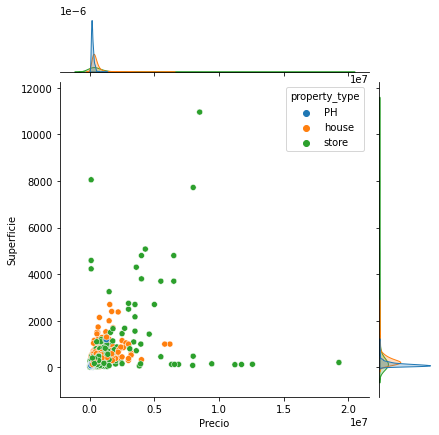

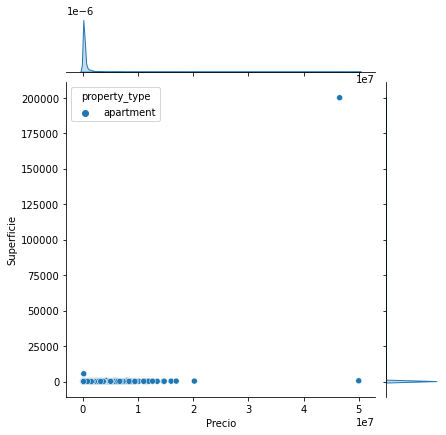

In [13]:
#Evaluacion de relacion entre variables 

mask_depto = ( dataP_caba.property_type != 'apartment')
g = sns.jointplot(data=dataP_caba.loc[mask_depto,:], x='price', y='surface_total_in_m2', hue='property_type')
g.set_axis_labels("Precio", "Superficie")
g = sns.jointplot(data=dataP_caba.loc[np.logical_not(mask_depto),:], x='price', y='surface_total_in_m2', hue='property_type')
g.set_axis_labels("Precio", "Superficie")
plt.show()
# Se observa que existen outliers que distorsionan la visualizacion , continuamos con la limpieza de las variables clave para una mejor interpretacion 

In [14]:
# Armo el geo_dataP_cabaSn solo con las columnas que me interesan
geo_dataP_cabaSn = dataP_caba.loc[:,['operation', 'property_type', 'place_name', 'lat', 'lon', 'price', \
                                        'currency', 'price_aprox_local_currency', 'price_aprox_usd', 'surface_total_in_m2', \
                                        'surface_covered_in_m2', 'price_usd_per_m2', 'price_per_m2', 'floor', 'rooms', \
                                         'expenses', 'description']]
geo_dataP_cabaSn.head(2)

,operation,property_type,place_name,lat,lon,price,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,description
0,sell,PH,Mataderos,-34.661824,-58.508839,62000.0,USD,1093959.0,62000.0,55.0,40.0,1127.272727,1550.000000,NaN,NaN,NaN,"2 AMBIENTES TIPO CASA PLANTA BAJA POR PASILLO,..."
2,sell,apartment,Mataderos,-34.652262,-58.522982,72000.0,USD,1270404.0,72000.0,55.0,55.0,1309.090909,1309.090909,NaN,NaN,NaN,2 AMBIENTES 3ER PISO LATERAL LIVING COMEDOR AM...


**Calculamos los Barrios Oficiales de CABA de a datos oficiales**

In [15]:
# Sumo los barrios oficiales de la ciudad de la Bs As
dataBa_location = "./data/barrios.geojson"
geo_dataBa = gpd.read_file(dataBa_location)
#Transformo el dataFrame de propiedades caba en geoDataframe
geometria = gpd.points_from_xy(geo_dataP_cabaSn.lon, geo_dataP_cabaSn.lat)
geo_dataP_cabaSn = gpd.GeoDataFrame(geo_dataP_cabaSn ,geometry=geometria)
geo_dataP_cabaSn.head(4)

,operation,property_type,place_name,lat,lon,price,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,description,geometry
0,sell,PH,Mataderos,-34.661824,-58.508839,62000.0,USD,1093959.0,62000.0,55.0,40.0,1127.272727,1550.000000,NaN,NaN,NaN,"2 AMBIENTES TIPO CASA PLANTA BAJA POR PASILLO,...",POINT (-58.50884 -34.66182)
2,sell,apartment,Mataderos,-34.652262,-58.522982,72000.0,USD,1270404.0,72000.0,55.0,55.0,1309.090909,1309.090909,NaN,NaN,NaN,2 AMBIENTES 3ER PISO LATERAL LIVING COMEDOR AM...,POINT (-58.52298 -34.65226)
3,sell,PH,Liniers,-34.647797,-58.516424,95000.0,USD,1676227.5,95000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PH 3 ambientes con patio. Hay 3 deptos en lote...,POINT (-58.51642 -34.64780)
7,sell,apartment,Belgrano,-34.559873,-58.443362,138000.0,USD,2434941.0,138000.0,45.0,40.0,3066.666667,3450.000000,NaN,NaN,NaN,EXCELENTE MONOAMBIENTE A ESTRENAR AMPLIO SUPER...,POINT (-58.44336 -34.55987)


In [16]:
# Calculo el barrio oficial de cada propiedad
geo_dataP_cabaSn['BarrioOficial'] = geo_dataP_cabaSn.geometry.apply (lambda x: x if x is np.NaN \
                                                     else fu.obtenerValorPorPunto(x, geo_dataBa, 'BARRIO'))
geo_dataP_cabaSn.head(2)

,operation,property_type,place_name,lat,lon,price,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,description,geometry,BarrioOficial
0,sell,PH,Mataderos,-34.661824,-58.508839,62000.0,USD,1093959.0,62000.0,55.0,40.0,1127.272727,1550.000000,NaN,NaN,NaN,"2 AMBIENTES TIPO CASA PLANTA BAJA POR PASILLO,...",POINT (-58.50884 -34.66182),MATADEROS
2,sell,apartment,Mataderos,-34.652262,-58.522982,72000.0,USD,1270404.0,72000.0,55.0,55.0,1309.090909,1309.090909,NaN,NaN,NaN,2 AMBIENTES 3ER PISO LATERAL LIVING COMEDOR AM...,POINT (-58.52298 -34.65226),LINIERS


**Analisis Superficie**

In [17]:
#geo_dataP_cabaSn.loc[maskSupinv,:].to_csv('./data/superficie.csv', sep=';') 
#Se bajo el universo a un archivo comprobandose al recalcular price= (price_usd_per_m2*surface_covered_in_m2) 
#validando contra el price informado se desprende que las superficies estan invertidas

Creamos dos nuevas columnas **sup_total_m2_clean** y **sup_cubierta_m2_clean** para modificar los datos

In [18]:
#Creo dos nuevas columnas para superficie
geo_dataP_cabaSn["sup_total_m2_clean"] = geo_dataP_cabaSn["surface_total_in_m2"]
geo_dataP_cabaSn["sup_cubierta_m2_clean"] = geo_dataP_cabaSn["surface_covered_in_m2"]
print('Cant casos sup total no nulos    ',geo_dataP_cabaSn["sup_total_m2_clean"].notna().sum())
print('Cant casos sup cubierta no nulos ',geo_dataP_cabaSn["sup_cubierta_m2_clean"].notna().sum())

Cant casos sup total no nulos     17996
Cant casos sup cubierta no nulos  20503


In [19]:
#Asigno ceros a las superficies nulas

geo_dataP_cabaSn["sup_total_m2_clean"].fillna(0, inplace = True)
geo_dataP_cabaSn["sup_cubierta_m2_clean"].fillna(0, inplace = True)

print('cant casos sup total no nulos    ',geo_dataP_cabaSn["sup_total_m2_clean"].notna().sum())
print('cant casos sup cubierta no nulos ',geo_dataP_cabaSn["sup_cubierta_m2_clean"].notna().sum())

cant casos sup total no nulos     21501
cant casos sup cubierta no nulos  21501


In [20]:
maskSupinvi = geo_dataP_cabaSn[(geo_dataP_cabaSn.sup_total_m2_clean < geo_dataP_cabaSn.sup_cubierta_m2_clean)].index

#Reasignacion de superficies invertidas
geo_dataP_cabaSn.loc[maskSupinvi,['sup_total_m2_clean', 'sup_cubierta_m2_clean']]=geo_dataP_cabaSn.loc[maskSupinvi, ['sup_cubierta_m2_clean','sup_total_m2_clean']].values


In [21]:
maskSupinv =  (geo_dataP_cabaSn.sup_total_m2_clean < geo_dataP_cabaSn.sup_cubierta_m2_clean)
print ("Cant superfices invertidas luego de reasignar", geo_dataP_cabaSn.loc[maskSupinv,:].shape[0])
#geo_dataP_cabaSn.loc[maskSupinv,:].to_csv('./data/superficie.csv', sep=';') 

Cant superfices invertidas luego de reasignar 0


In [22]:
#Analizo los casos con superficie < 10

mask_supMenos10 = geo_dataP_cabaSn.sup_total_m2_clean < 10
print ('casos con superficie < 10 ', geo_dataP_cabaSn.loc[mask_supMenos10,:].size)
print ('casos con superficie      ', geo_dataP_cabaSn.sup_total_m2_clean.notna().sum())

### Al llegar a la parte final del análisis concluimos #que estos casos deben eliminarse
# debido que no contamos con otros datos a partir de los cuáles pudieran recalcularse
# nos pareció conveniente hacerlo en esta etapa

casos con superficie < 10  2373
casos con superficie       21501


In [23]:
supe_menor10_index = geo_dataP_cabaSn.loc[mask_supMenos10,:].index
supe_menor10_index
geo_dataP_cabaSn.drop(supe_menor10_index , inplace=True)

In [24]:
#Analizo los casos con superficie < 10

mask_supMenos10 = geo_dataP_cabaSn.sup_total_m2_clean < 10
print ('casos con superficie < 10 ', geo_dataP_cabaSn.loc[mask_supMenos10,:].size)
print ('casos con superficie      ', geo_dataP_cabaSn.sup_total_m2_clean.notna().sum())

casos con superficie < 10  0
casos con superficie       21388


**Análisis de columna rooms**

In [25]:
print(geo_dataP_cabaSn.rooms.isnull().sum())
#
print(geo_dataP_cabaSn.rooms.notna().sum())
#

10544
10844


**Análisis de la columna expenses**

In [26]:
#Analisis de variable expenses
print('expensas en null', geo_dataP_cabaSn.expenses.isnull().sum())
#
print('expensas no nulas', geo_dataP_cabaSn.expenses.notna().sum())
#

expensas en null 16963
expensas no nulas 4425


**Análisis de columna price**

In [27]:
# Analisis de variable precio
print('price null y USD                ', geo_dataP_cabaSn.loc[geo_dataP_cabaSn.currency == 'USD','price'].isnull().sum())
# 0
print('price no null y USD             ', geo_dataP_cabaSn.loc[geo_dataP_cabaSn.currency == 'USD','price'].notna().sum())
# 27193
print('price_aprox_usd no nulos != USD ',geo_dataP_cabaSn.loc[geo_dataP_cabaSn.currency != 'USD','price_aprox_usd'].notna().sum())
#1187

price null y USD                 0
price no null y USD              19595
price_aprox_usd no nulos != USD  1035


Generamos una nueva columna **precio_clean** , sabemos que para moneda USD no hay price nulos, tomamos el price_aprox_usd para intentar imputar valores faltantes para moneda USD


In [28]:
# Agrego una columna de precio para normalizar la información. Le agrego el valor literal de price o de price_aprox_usd

#Completamos con los price que son != nulo
geo_dataP_cabaSn["precio_clean"] = geo_dataP_cabaSn.loc[geo_dataP_cabaSn.currency == 'USD','price']
print ('#precio_clean imputados por price                   ', geo_dataP_cabaSn.precio_clean.notna().sum()) 

#Los casos que quedan en nulo intentamos imputar con price_aprox_usd
mask_nulos_precio_clean = geo_dataP_cabaSn.precio_clean.isnull() & geo_dataP_cabaSn.currency != 'USD'
geo_dataP_cabaSn["precio_clean"] = geo_dataP_cabaSn.loc[mask_nulos_precio_clean,'price_aprox_usd']

print ('#precio_clean imputados por price + price_aprox_usd ', geo_dataP_cabaSn.precio_clean.notna().sum()) 

#precio_clean imputados por price                    19595
#precio_clean imputados por price + price_aprox_usd  20630


**Análisis de outliers precio_clean**

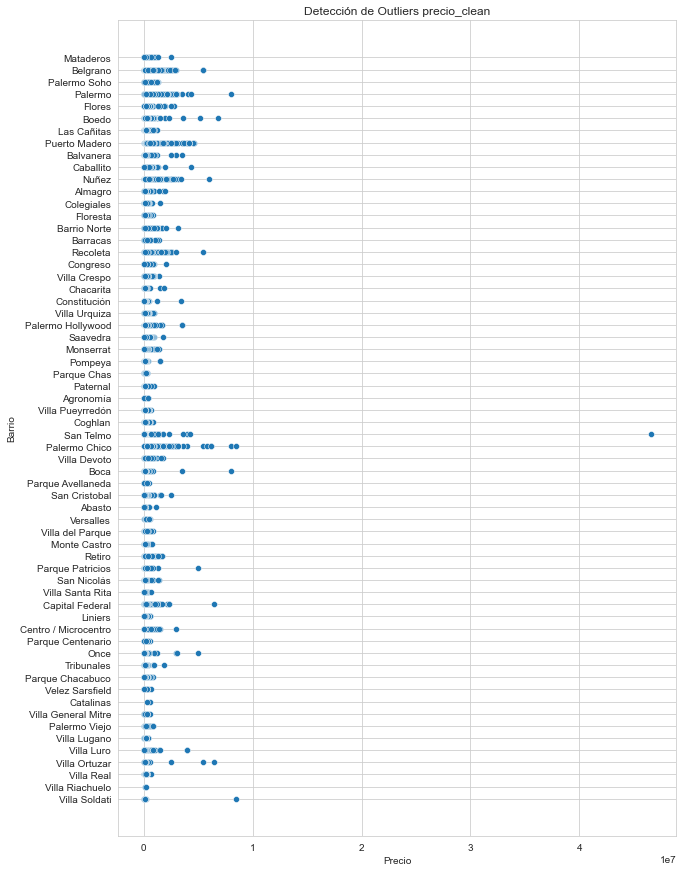

In [29]:
sns.set_style('whitegrid')
plt.figure(figsize=(10, 15))
sns.scatterplot(data=geo_dataP_cabaSn, x="precio_clean", y="place_name")

plt.xlabel("Precio"); plt.ylabel("Barrio");plt.title("Detección de Outliers precio_clean")
plt.show()

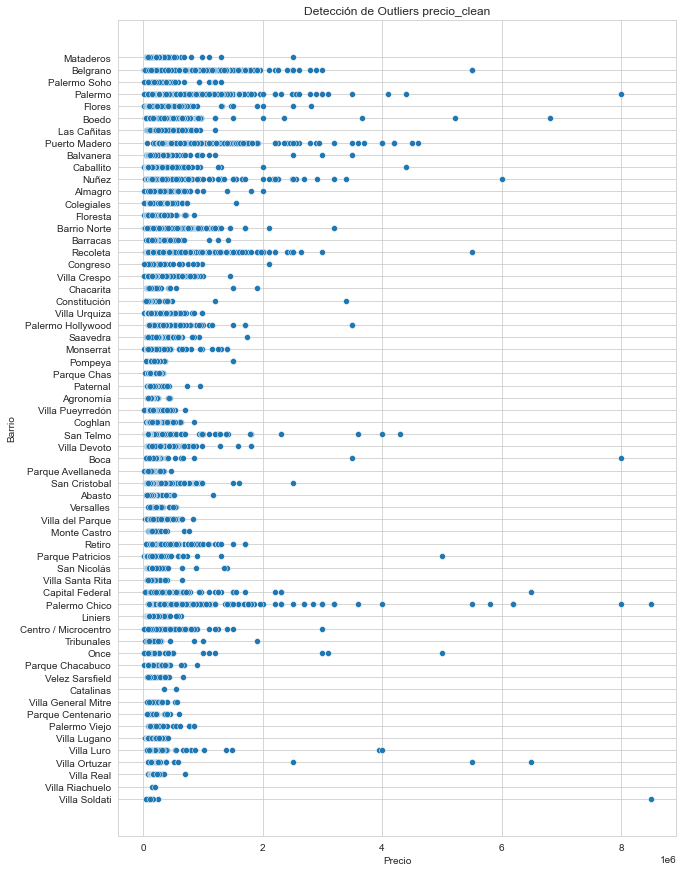

In [30]:
#elimino el valor mas alejado para evaluar mejor la escala
maskoutprecio = geo_dataP_cabaSn.precio_clean < 40000000

sns.set_style('whitegrid')
plt.figure(figsize=(10, 15))
sns.scatterplot(data=geo_dataP_cabaSn.loc[maskoutprecio], x="precio_clean", y="place_name")

plt.xlabel("Precio"); plt.ylabel("Barrio");plt.title("Detección de Outliers precio_clean")
plt.show()

In [31]:
## Detectamos propiedades que no entrar dentro de los parámetros normales por sus caracteristicas exclusivas
## nos parece interesante mantenerlas para utilizarlas en el tasador pero distorsionan los casos standar
## por este motivo creamos una columna luxury en SI en el caso que cumpla estas características

geo_dataP_cabaSn["luxury"]  = geo_dataP_cabaSn.description.apply(lambda x: x if x is np.NaN else fu.obtenerLuxury(x))

print('Luxury en null', geo_dataP_cabaSn.luxury.isnull().sum())
#
print('Luxury no nulas', geo_dataP_cabaSn.luxury.notna().sum())
# 68 casos marcados
maskLuxury = geo_dataP_cabaSn.luxury == 'SI' 
maskSinLux = geo_dataP_cabaSn.luxury!= 'SI' 
# se bajaron los casos a archivos para verificar
#geo_dataP_cabaSn.loc[maskLuxury,['operation', 'property_type', 'place_name', 'price', 
#       'currency', 'price_aprox_local_currency', 'price_aprox_usd','precio_clean',
#      'sup_total_m2_clean', 'sup_cubierta_m2_clean', 'price_usd_per_m2',
#       'price_per_m2', 'floor', 'rooms', 'expenses', 'description']].to_csv('./data/luxury.csv', sep=';', mode='w')

Luxury en null 21320
Luxury no nulas 68


In [32]:
# Se observa que por arriba de 2 M estan los desvios mas significativos , se revisan esos casos 

maskprecioOut = (geo_dataP_cabaSn.precio_clean > 2000000)
data_precio = geo_dataP_cabaSn.loc[maskprecioOut, :]
#data_precio.loc[:,[ 'precio_clean','operation', 'property_type', 'place_name', 'lat', 'lon', 'price',
#       'currency', 'price_aprox_local_currency', 'price_aprox_usd',
#      'sup_total_m2_clean', 'sup_cubierta_m2_clean', 'price_usd_per_m2',
#       'price_per_m2', 'floor', 'rooms', 'expenses', 'description']].to_csv('./data/outliers_precio_clean2.csv', sep=';', mode='w')  # 152 casos a revisarvemos

# Al analizar la información visualmente, se observa que los precios altos corresponden en su gran mayoría a 
# propiedades con superficies muy grandes, motivo por el cual no se puede inferir que sean incorrectos
# evaluar eliminar aquellos casos con superficie extremadamente alta (xej 200mil) y sin precio_x_m2
data_precio.shape[0]

148

**Análisis de columna price_usd_per_m2**

In [33]:
print('#Price_usd_per_m2 no nulos   ',geo_dataP_cabaSn.price_usd_per_m2.notna().sum()) #17242

mask_p_x_m2 =  geo_dataP_cabaSn.price_usd_per_m2 < 10000
print( '#Price_usd_per_m2 <10.000    ',geo_dataP_cabaSn.loc[mask_p_x_m2].shape[0])#16707


#Price_usd_per_m2 no nulos    17242
#Price_usd_per_m2 <10.000     16707


Generamos la columna **precio_x_m_clean** con los datos de price_usd_per_m2, price_per_m2 (si la moneda no es usd y con la relación precio_clean y surface_total_in_m2

In [34]:
# precio_x_m_clean a partir de price_usd_per_m2
#mask_p_x_m2 =  geo_dataP_cabaSn.price_usd_per_m2 < 10000
#----------------------------------------------------------------
geo_dataP_cabaSn['precio_x_m_clean'] = geo_dataP_cabaSn["price_usd_per_m2"] 
print ('Casos imputados a precio_x_m_clean        ', geo_dataP_cabaSn.precio_x_m_clean.notna().sum())
#----------------------------------------------------------------
print ('Casos con precio_x_m_clean en nulo        ',geo_dataP_cabaSn.precio_x_m_clean.isnull().sum())

Casos imputados a precio_x_m_clean         17242
Casos con precio_x_m_clean en nulo         4146


In [35]:
# precio_x_m_clean a partir de precio_clean/surface_total_in_m2
mask_precio_xm_aprox = (geo_dataP_cabaSn.precio_x_m_clean.isnull()) & (geo_dataP_cabaSn.sup_total_m2_clean !=0)
print("Casos precio_x_m_clean nulo ", geo_dataP_cabaSn.loc[mask_precio_xm_aprox,'precio_x_m_clean'].isnull().sum()) #4167
geo_dataP_cabaSn.loc[mask_precio_xm_aprox,'precio_x_m_clean'] = geo_dataP_cabaSn.loc[mask_precio_xm_aprox,'precio_clean']/geo_dataP_cabaSn.loc[mask_precio_xm_aprox,'sup_total_m2_clean']
print("Casos precio_x_m_clean nulo ", geo_dataP_cabaSn.loc[mask_precio_xm_aprox,'precio_x_m_clean'].isnull().sum()) #758


Casos precio_x_m_clean nulo  4146
Casos precio_x_m_clean nulo  758


**Análisis de outliers precio_x_m_clean**

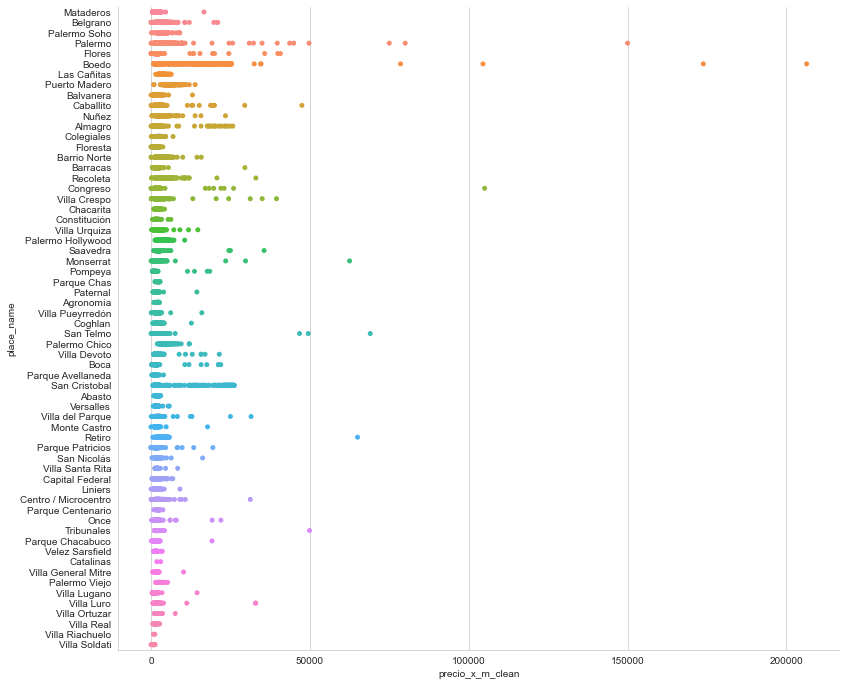

In [36]:
#Observo la columna precio_clean por Barrio
g= sns.catplot(x="precio_x_m_clean", y="place_name", data=geo_dataP_cabaSn.loc[maskSinLux], jitter=False)
g.fig.set_size_inches(15, 10)
#Para la variable precio clean  se observa que tiene outliers mas marcados en ciertos barrios

In [37]:
# Con el onjetivo de analizar los outliers tomo los valores > a 10000, luego de probar con otros umbrales
# excluyo los casos luxury
mask_desviospxm = ( geo_dataP_cabaSn.precio_x_m_clean > 10000 ) & maskSinLux
print ('Con valor mayor a 10.000 nueva         ',geo_dataP_cabaSn.loc[mask_desviospxm,'precio_x_m_clean'].shape[0])


Con valor mayor a 10.000 nueva          592


In [38]:
# Del análisis del archivo resultante se decide recalcular nuevamente precio_x_m_clean a partir de precio_clean y sup_total_m2_clean
geo_dataP_cabaSn.loc[mask_desviospxm,'precio_x_m_clean'] = geo_dataP_cabaSn.precio_clean/geo_dataP_cabaSn.sup_total_m2_clean
print("Casos precio_x_m_clean nulo               ", geo_dataP_cabaSn.loc[mask_desviospxm,'precio_x_m_clean'].isnull().sum()) #0

# luego de ejecutar la sentencia anterior se observan:

# 1. Casos con surface_total_in_m2 < 10, decisión: por ahora se excluyen de solución
mask_supMas10 = geo_dataP_cabaSn.sup_total_m2_clean > 10
mask_supMenos10 = geo_dataP_cabaSn.sup_total_m2_clean < 10
print ('Casos totales con sup     < 10 m2         ',geo_dataP_cabaSn.loc[mask_supMenos10].shape[0]) # 113 casos
print ('Casos en análisis con sup < 10 m2         ',geo_dataP_cabaSn.loc[mask_supMenos10&mask_desviospxm].shape[0]) # 18 casos

# 2. Casos con precio_x_m_clean < 5000, decisión: se consideran ok
mask_pxmhasta5m = geo_dataP_cabaSn.precio_x_m_clean <= 5000
print ('Casos en análisis con pxm < 5000          ',geo_dataP_cabaSn.loc[mask_pxmhasta5m&mask_desviospxm].shape[0]) 

# 3. Casos con precio_x_m_clean entre 5000 y 100000, decisión: dividir por 10 precio_x_m_clean y precio_clean
mask_5y100mil = (geo_dataP_cabaSn.precio_x_m_clean> 5000)  & (geo_dataP_cabaSn.precio_x_m_clean < 100000)
print ('Casos en análisis con pxm entre 5 y 100 m ',geo_dataP_cabaSn.loc[mask_5y100mil&mask_desviospxm].shape[0]) 

# 4. Casos con precio_x_m_clean > 100000, decisión: dividir por 100 precio_x_m_clean y precio_clean
# exceptuando una casa en Palermo que se verifica en description que tiene mas de 400m2 y figuran 20
mask_hp = ((geo_dataP_cabaSn.property_type == 'house') & (geo_dataP_cabaSn.place_name == 'Palermo') & (geo_dataP_cabaSn.sup_total_m2_clean == 20))
mask_mas100mil = (geo_dataP_cabaSn.precio_x_m_clean > 100000)
print ('Casos en análisis con pxm mayores a 100000',geo_dataP_cabaSn.loc[mask_mas100mil&mask_desviospxm&(geo_dataP_cabaSn.precio_clean!=3000000)].shape[0])
print ('Casos a no modificar House-Palermo-sup20  ',geo_dataP_cabaSn.loc[mask_hp&mask_mas100mil&mask_desviospxm].shape[0]) 

Casos precio_x_m_clean nulo                0
Casos totales con sup     < 10 m2          0
Casos en análisis con sup < 10 m2          0
Casos en análisis con pxm < 5000           9
Casos en análisis con pxm entre 5 y 100 m  578
Casos en análisis con pxm mayores a 100000 4
Casos a no modificar House-Palermo-sup20   1


In [39]:
# 3. solución:
geo_dataP_cabaSn.loc[mask_5y100mil&mask_desviospxm, ['precio_x_m_clean','precio_clean']]= \
                geo_dataP_cabaSn.loc[mask_5y100mil&mask_desviospxm, ['precio_x_m_clean','precio_clean']]/10

# 4. solución:  //(geo_dataP_cabaSn.precio_clean!=3000000) caso palermo
mask_hp3 = (geo_dataP_cabaSn.precio_clean!=3000000)
geo_dataP_cabaSn.loc[mask_mas100mil&mask_desviospxm&mask_hp3, ['precio_x_m_clean','precio_clean']]= \
                geo_dataP_cabaSn.loc[mask_mas100mil&mask_desviospxm&mask_hp3, ['precio_x_m_clean','precio_clean']]/100

In [40]:
# vuelvo a correr esta consulta inicial
mask_desviospxm = ( geo_dataP_cabaSn.precio_x_m_clean > 10000 )
print ('precio_x_m_clean con valor mayor a 10.000 nueva         ',geo_dataP_cabaSn.loc[mask_desviospxm,'precio_x_m_clean'].shape[0])
## ahora trae 20 casos, los 19 con sup < 10 y el caso de la casa en Palermo que se excluyó de la solución

precio_x_m_clean con valor mayor a 10.000 nueva          9


In [41]:
#listo el remanente de casos 
geo_dataP_cabaSn.loc[mask_hp3&(geo_dataP_cabaSn.precio_x_m_clean > 4000)& maskSinLux,['place_name','property_type','precio_clean', 'precio_x_m_clean', 'sup_total_m2_clean',\
'sup_cubierta_m2_clean']].sort_values(by='precio_x_m_clean', ascending=False)


,place_name,property_type,precio_clean,precio_x_m_clean,sup_total_m2_clean,sup_cubierta_m2_clean
11067,Recoleta,apartment,1500000.0,10000.000000,150.0,150.0
74272,Nuñez,store,1000000.0,10000.000000,100.0,100.0
7382,Barrio Norte,store,480000.0,10000.000000,48.0,48.0
88501,Puerto Madero,apartment,370000.0,10000.000000,37.0,31.0
30972,Palermo,house,2990000.0,9966.666667,380.0,300.0
...,...,...,...,...,...,...
73693,Palermo,apartment,597000.0,4006.711409,149.0,76.0
17189,Palermo,apartment,597000.0,4006.711409,149.0,77.0
7465,Palermo,apartment,636297.0,4001.867925,159.0,141.0
7469,Palermo,apartment,568265.0,4001.866197,142.0,115.0


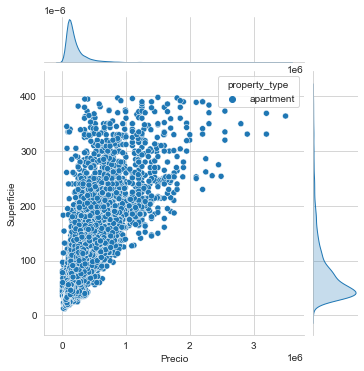

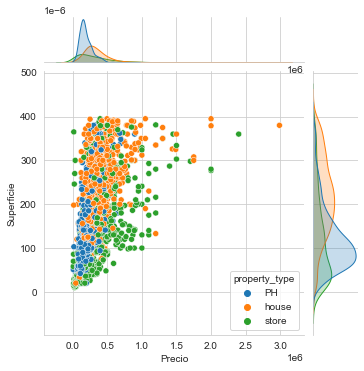

In [42]:
mas_sup= geo_dataP_cabaSn.sup_total_m2_clean < 400
# Una vez realizada la limpieza de primer nivel se vuelve a evaluar la relacion entre variables 
# Decision : Evaluar apartment por separado dado a que la predominancia de este tipo de propiedad no permite una lectura correcta junto al resto de los tipos de propiedad ( House, Store, PH)
mask_apartment = ( geo_dataP_cabaSn.property_type ==  'apartment')
mask_sindepto = ( geo_dataP_cabaSn.property_type != 'apartment')
g = sns.jointplot(data=geo_dataP_cabaSn.loc[mask_hp3&mas_sup&mask_apartment& maskSinLux,:], x='precio_clean', y='sup_total_m2_clean', hue='property_type')
g.fig.set_size_inches(5, 5)
g.set_axis_labels("Precio", "Superficie")
g = sns.jointplot(data=geo_dataP_cabaSn.loc[mask_hp3&mas_sup&mask_sindepto,:], x='precio_clean', y='sup_total_m2_clean', hue='property_type')
g.fig.set_size_inches(5, 5)
g.set_axis_labels("Precio", "Superficie")
plt.show()

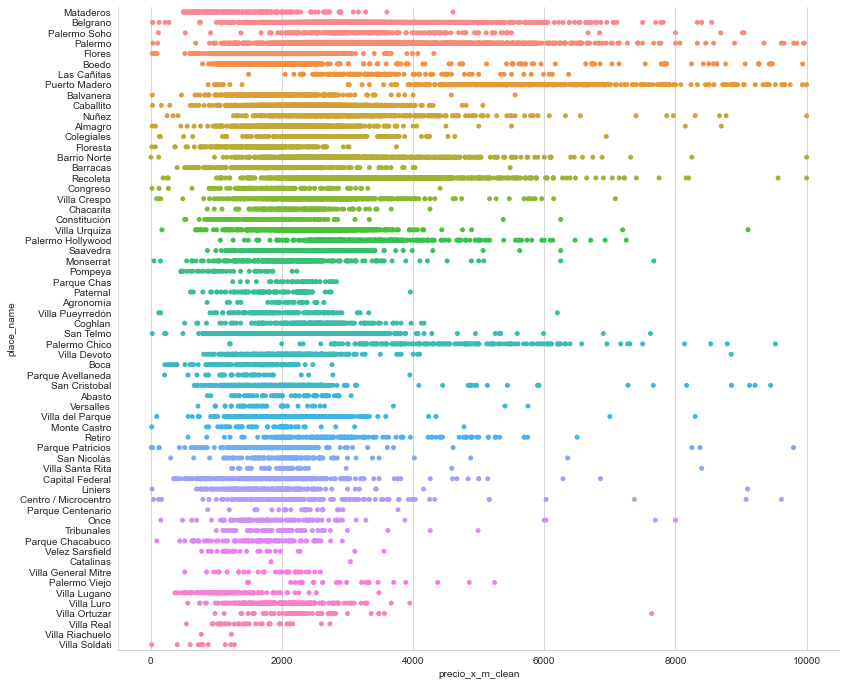

In [43]:
#Observo la columna precio_x_m_clean por Barrio luego de la limpieza
df=geo_dataP_cabaSn.loc[mask_hp3& maskSinLux,:]
g= sns.catplot(x="precio_x_m_clean", y="place_name", data=df, jitter=False)
g.fig.set_size_inches(15, 10)
#

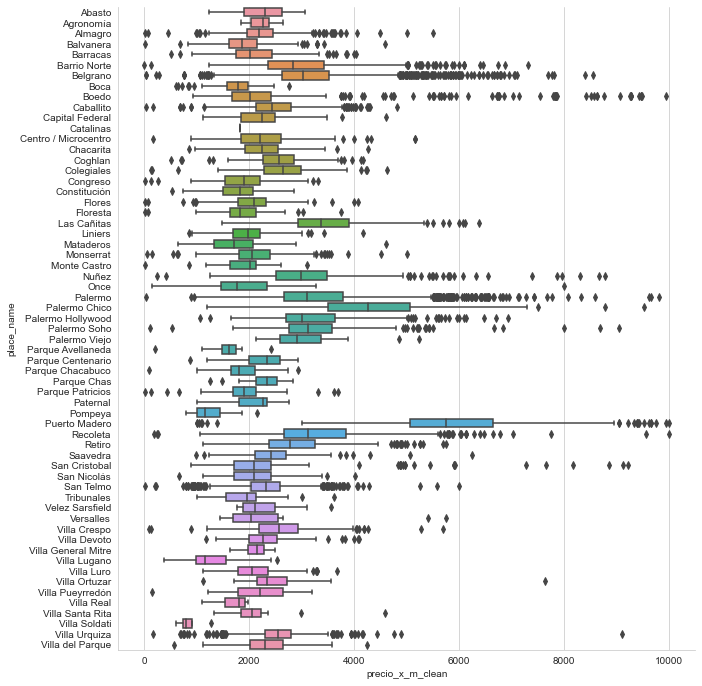

In [44]:
mask_apartment = ( geo_dataP_cabaSn.property_type ==  'apartment')
data_precio = geo_dataP_cabaSn.loc[mask_hp3&mask_apartment& maskSinLux,:].sort_values(by='place_name')
g = sns.catplot(y="place_name", x="precio_x_m_clean", kind="box", data=data_precio)
g.fig.set_size_inches(12, 10)

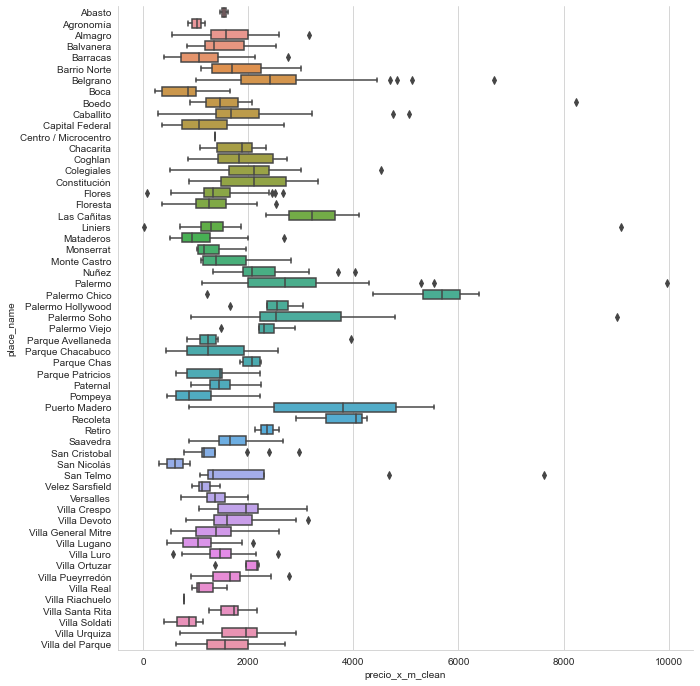

In [45]:
mask_house = ( geo_dataP_cabaSn.property_type ==  'house')
data_precio = geo_dataP_cabaSn.loc[mask_hp3&mask_house,:].sort_values(by='place_name')
g = sns.catplot(y="place_name", x="precio_x_m_clean", kind="box", data=data_precio)
g.fig.set_size_inches(12, 10)


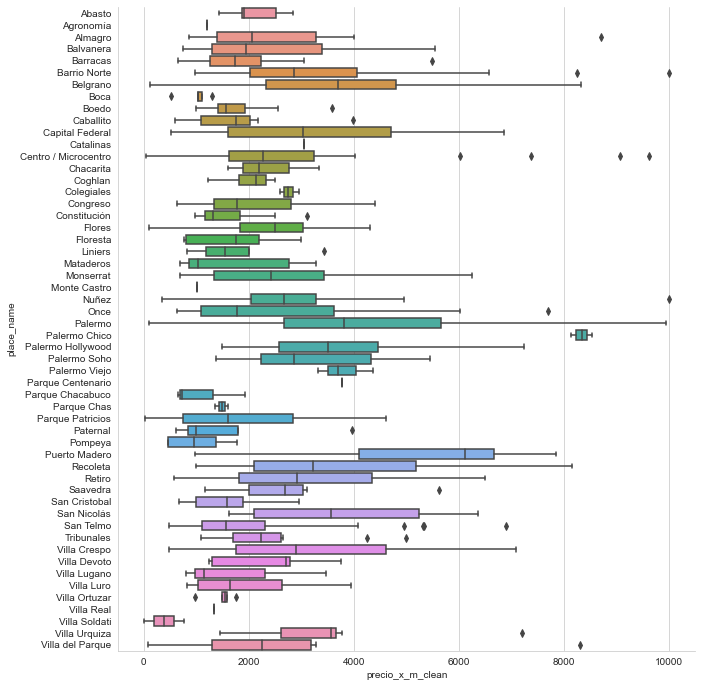

In [46]:
mask_store = ( geo_dataP_cabaSn.property_type ==  'store')
data_precio = geo_dataP_cabaSn.loc[mask_store,:].sort_values(by='place_name')
g = sns.catplot(y="place_name", x="precio_x_m_clean", kind="box", data=data_precio)
g.fig.set_size_inches(12, 10)


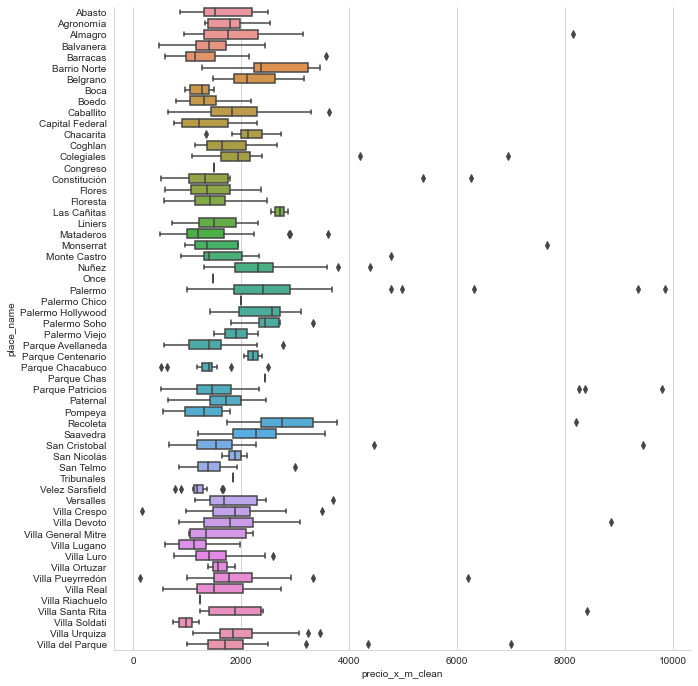

In [47]:
mask_ph = ( geo_dataP_cabaSn.property_type ==  'PH')
data_precio = geo_dataP_cabaSn.loc[mask_ph,:].sort_values(by='place_name')
g = sns.catplot(y="place_name", x="precio_x_m_clean", kind="box", data=data_precio)
g.fig.set_size_inches(12, 10)


Analizo los outliers de Boedo y San Cristobal

In [48]:
#Mediante la visualización de los gráficos se establece que los precio_x_m_clean 
#en Boedo Y San Cristobal estan defasados, generamos una pivot table para comparar con los barrios linderos
maskBarrio= ((geo_dataP_cabaSn.place_name=='Boedo')|(geo_dataP_cabaSn.place_name=='Balvanera')|(geo_dataP_cabaSn.place_name=='Almagro')|(geo_dataP_cabaSn.place_name=='Congreso')|(geo_dataP_cabaSn.place_name=='San Cristobal'))
pd.pivot_table(geo_dataP_cabaSn.loc[maskBarrio,:], values='precio_x_m_clean', aggfunc=['mean','max'], index= 'property_type', columns='place_name' )

mean                                         \
place_name         Almagro    Balvanera        Boedo     Congreso   
property_type                                                       
PH             1938.578802  1452.454574  1353.043361  1500.000000   
apartment      2234.720044  1909.433691  2509.023041  1889.445184   
house          1628.717219  1553.582478  1723.645670          NaN   
store          2562.018310  2301.867794  1756.285465  2004.521039   

                                     max                            \
place_name    San Cristobal      Almagro    Balvanera        Boedo   
property_type                                                        
PH              1788.433880  8150.000000  2438.596491  2172.413793   
apartment       2237.739317  5500.000000  4583.333333  9938.571429   
house           1397.423873  3157.894737  2518.867925  8245.000000   
store           1578.522424  8700.000000  5555.555556  3589.743590   

                                          
place_name        Congreso San Cristobal  
property_type                             
PH             1500.000000   9450.000000  
apartment      3309.431818   9212.500000  
house                  NaN   2972.500000  
store          4411.764706   2950.819672

In [49]:
#Boedo tiene disparados apartment y house
#San Cristobal PH y apartment
#---------------------------------------------------------
# Cant de casos totales y mediana para Boedo Y San Cristobal
maskBarrio= ((geo_dataP_cabaSn.place_name=='Boedo')|(geo_dataP_cabaSn.place_name=='San Cristobal'))
pd.pivot_table(geo_dataP_cabaSn.loc[maskBarrio,:], values='precio_x_m_clean', aggfunc=['count','median'], index= 'property_type', columns='place_name' )

count                     median              
place_name    Boedo San Cristobal        Boedo San Cristobal
property_type                                               
PH               22            34  1299.298680   1539.386792
apartment       498           359  2010.333333   2098.039216
house            27            13  1452.000000   1148.936170
store            14            12  1571.993671   1586.099907

In [50]:
# Le agrego una máscara para establecer el umbral de outliers 
# precio_x_m_clean >2000

maskBarrio= ((geo_dataP_cabaSn.place_name=='Boedo')|(geo_dataP_cabaSn.place_name=='San Cristobal'))
maskPrecioOut= geo_dataP_cabaSn.precio_x_m_clean >2000
pd.pivot_table(geo_dataP_cabaSn.loc[maskBarrio&maskPrecioOut,:], values='precio_x_m_clean', aggfunc=['count','mean'], index= 'property_type', columns='place_name' )

count                       mean              
place_name    Boedo San Cristobal        Boedo San Cristobal
property_type                                               
PH                2             4  2104.279186   4581.287879
apartment       256           212  3387.840400   2702.717467
house             3             2  4131.516920   2678.557692
store             3             3  2748.162705   2593.168104

In [51]:
# Comparo con el cuadro anterior y la máscara inversa precio_x_m_clean <=2000

maskBarrio= ((geo_dataP_cabaSn.place_name=='Boedo')|(geo_dataP_cabaSn.place_name=='San Cristobal'))
maskPrecio= geo_dataP_cabaSn.precio_x_m_clean <= 2000
df_medias =pd.pivot_table(geo_dataP_cabaSn.loc[maskBarrio&maskPrecio,:], values='precio_x_m_clean', aggfunc=['count','mean'], index= 'property_type', columns='place_name' )
df_medias

count                       mean              
place_name    Boedo San Cristobal        Boedo San Cristobal
property_type                                               
PH               20            30  1277.919779   1416.053347
apartment       242           147  1579.365009   1567.158583
house            24            11  1422.661764   1164.490452
store            11             9  1485.773491   1240.307197

In [52]:
### Consideramos para imputar los valores obtenidos de la media de los casos en el rango sin ouliers para Boedo Y San Cristobal
ValBoedoPh = 1278
ValBoedoAp = 1580
ValBoedoH = 1423
ValBoedoSt = 1486
ValSCristPh = 1416
ValSCristAp = 1567
ValSCristH = 1164
ValSCristSt = 1240
#Guardo el ínidice para recalcular el precio_clean
indice_Boedo = geo_dataP_cabaSn.loc[(geo_dataP_cabaSn.place_name=='Boedo')&maskPrecioOut].index
geo_dataP_cabaSn.loc[(geo_dataP_cabaSn.place_name=='Boedo')&maskPrecioOut&(geo_dataP_cabaSn.property_type=='PH'),'precio_x_m_clean']=geo_dataP_cabaSn.precio_x_m_clean.apply(lambda x :ValBoedoPh)
geo_dataP_cabaSn.loc[(geo_dataP_cabaSn.place_name=='Boedo')&maskPrecioOut&(geo_dataP_cabaSn.property_type=='apartment'),'precio_x_m_clean']=geo_dataP_cabaSn.precio_x_m_clean.apply(lambda x :ValBoedoAp)
geo_dataP_cabaSn.loc[(geo_dataP_cabaSn.place_name=='Boedo')&maskPrecioOut&(geo_dataP_cabaSn.property_type=='house'),'precio_x_m_clean']=geo_dataP_cabaSn.precio_x_m_clean.apply(lambda x :ValBoedoH)
geo_dataP_cabaSn.loc[(geo_dataP_cabaSn.place_name=='Boedo')&maskPrecioOut&(geo_dataP_cabaSn.property_type=='store'),'precio_x_m_clean']=geo_dataP_cabaSn.precio_x_m_clean.apply(lambda x :ValBoedoSt)

#Guardo el ínidice para recalcular el precio_clean
indice_SanCristobal=geo_dataP_cabaSn.loc[(geo_dataP_cabaSn.place_name=='San Cristobal')&maskPrecioOut].index
geo_dataP_cabaSn.loc[(geo_dataP_cabaSn.place_name=='San Cristobal')&maskPrecioOut&(geo_dataP_cabaSn.property_type=='PH'),'precio_x_m_clean']=geo_dataP_cabaSn.precio_x_m_clean.apply(lambda x :ValSCristPh)
geo_dataP_cabaSn.loc[(geo_dataP_cabaSn.place_name=='San Cristobal')&maskPrecioOut&(geo_dataP_cabaSn.property_type=='apartment'),'precio_x_m_clean']=geo_dataP_cabaSn.precio_x_m_clean.apply(lambda x :ValSCristAp)
geo_dataP_cabaSn.loc[(geo_dataP_cabaSn.place_name=='San Cristobal')&maskPrecioOut&(geo_dataP_cabaSn.property_type=='house'),'precio_x_m_clean']=geo_dataP_cabaSn.precio_x_m_clean.apply(lambda x :ValSCristH)
geo_dataP_cabaSn.loc[(geo_dataP_cabaSn.place_name=='San Cristobal')&maskPrecioOut&(geo_dataP_cabaSn.property_type=='store'),'precio_x_m_clean']=geo_dataP_cabaSn.precio_x_m_clean.apply(lambda x :ValSCristSt)

#recalculo Precio_clean
geo_dataP_cabaSn.loc[indice_Boedo,'precio_clean'] = geo_dataP_cabaSn.loc[indice_Boedo,'precio_x_m_clean'] * geo_dataP_cabaSn.loc[indice_Boedo,'sup_total_m2_clean']
geo_dataP_cabaSn.loc[indice_SanCristobal,'precio_clean'] = geo_dataP_cabaSn.loc[indice_SanCristobal,'precio_x_m_clean'] * geo_dataP_cabaSn.loc[indice_SanCristobal,'sup_total_m2_clean']

In [53]:
#verificamos los resultados luego de imputar precio_x_m_clean 
# vemos que se corrigieron
maskBarrio= ((geo_dataP_cabaSn.place_name=='Boedo')|(geo_dataP_cabaSn.place_name=='Balvanera')|(geo_dataP_cabaSn.place_name=='Almagro')|(geo_dataP_cabaSn.place_name=='Congreso')|(geo_dataP_cabaSn.place_name=='San Cristobal'))
pd.pivot_table(geo_dataP_cabaSn.loc[maskBarrio,:], values='precio_x_m_clean', aggfunc=['mean','max'], index= 'property_type', columns='place_name' )

mean                                         \
place_name         Almagro    Balvanera        Boedo     Congreso   
property_type                                                       
PH             1938.578802  1452.454574  1277.927072  1500.000000   
apartment      2234.720044  1909.433691  1579.691430  1889.445184   
house          1628.717219  1553.582478  1422.699345          NaN   
store          2562.018310  2301.867794  1485.822028  2004.521039   

                                     max                            \
place_name    San Cristobal      Almagro    Balvanera        Boedo   
property_type                                                        
PH              1416.047071  8150.000000  2438.596491  1880.952381   
apartment       1567.064935  5500.000000  4583.333333  2000.000000   
house           1164.414998  3157.894737  2518.867925  2000.000000   
store           1240.230398  8700.000000  5555.555556  1951.219512   

                                          
place_name        Congreso San Cristobal  
property_type                             
PH             1500.000000   2000.000000  
apartment      3309.431818   1992.105263  
house                  NaN   1965.811966  
store          4411.764706   1741.935484

Analizo los outliers de Palermo

In [54]:
#Mediante la visualización de los gráficos se establece que los precio_x_m_clean en Palermo y Palermo chico estan defasados
## se utilizará el mismo Criterio que para Boedo
maskBarrioP= ((geo_dataP_cabaSn.place_name=='Palermo Chico')|(geo_dataP_cabaSn.place_name=='Palermo')|(geo_dataP_cabaSn.place_name=='Palermo Soho')|(geo_dataP_cabaSn.place_name=='Palermo Viejo')|(geo_dataP_cabaSn.place_name=='Palermo Hollywood'))
pd.pivot_table(geo_dataP_cabaSn.loc[maskBarrioP&mask_supMas10&mask_hp3,:], values='precio_x_m_clean', aggfunc='mean', index= 'property_type', columns='place_name')

place_name,Palermo,Palermo Chico,Palermo Hollywood,Palermo Soho,Palermo Viejo
property_type,,,,,
PH,2695.492321,1997.126437,2359.900165,2519.273653,1899.679487
apartment,3383.882824,4817.407397,3257.039236,3312.694541,3148.074927
house,2846.022864,5262.302632,2465.491905,3486.946476,2269.473202
store,4241.772085,8338.060125,3647.717331,3249.229352,3796.075838


In [55]:
# Le agrego una máscara para establecer el umbral de outliers 
# precio_x_m_clean >2000

maskBarrio= ((geo_dataP_cabaSn.place_name=='Palermo')|(geo_dataP_cabaSn.place_name=='Palermo Chico'))|(geo_dataP_cabaSn.place_name=='Palermo Soho')|(geo_dataP_cabaSn.place_name=='Palermo Viejo')
maskPrecioOut= geo_dataP_cabaSn.precio_x_m_clean >2399
pd.pivot_table(geo_dataP_cabaSn.loc[maskBarrioP&maskPrecioOut& maskSinLux&mask_hp3,:], values='precio_x_m_clean', aggfunc=['max','mean'], index= 'property_type', columns='place_name' )

max                                               \
place_name         Palermo Palermo Chico Palermo Hollywood Palermo Soho   
property_type                                                             
PH             9850.000000           NaN       3111.111111  3333.333333   
apartment      9803.149606   9523.809524       6927.710843  9045.454545   
house          9966.666667   6391.752577       3035.714286  9022.556391   
store          9950.000000   8536.585366       7250.000000  5444.444444   

                                    mean                                  \
place_name    Palermo Viejo      Palermo Palermo Chico Palermo Hollywood   
property_type                                                              
PH                      NaN  3588.272243           NaN       2716.382057   
apartment       5241.379310  3567.701798   4488.826798       3321.583682   
house           2888.888889  3579.580849   5599.817751       2777.811694   
store           4375.000000  4818.747169   8338.060125       3921.478703   

                                          
place_name    Palermo Soho Palermo Viejo  
property_type                             
PH             2720.114427           NaN  
apartment      3495.849100   3358.232744  
house          4765.131428   2684.444444  
store          4215.082552   3796.075838

In [56]:
#De los datos observados tomamos como valores regulares los siguientes:
## ph Palermo --> 2400
ValPalermoPh= 2400
## ap Palermo ---> 3300
ValPalermoAp=3300
## h Palermo ---> 2500
ValPalermoH=2500
## st palermo ----> 3700
ValPalermoSt=3700

#Modifico los mayores a 4000
maskPrecioOut =geo_dataP_cabaSn.precio_x_m_clean >4000
#Guardo el ínidice para recalcular el precio_clean
indice_Palermo=geo_dataP_cabaSn.loc[maskBarrioP&maskSinLux&mask_hp3&maskPrecioOut].index
geo_dataP_cabaSn.loc[maskBarrioP&maskSinLux&mask_hp3&maskPrecioOut&(geo_dataP_cabaSn.property_type=='PH'),'precio_x_m_clean']=geo_dataP_cabaSn.precio_x_m_clean.apply(lambda x : ValPalermoPh)
geo_dataP_cabaSn.loc[maskBarrioP&maskSinLux&mask_hp3&maskPrecioOut&(geo_dataP_cabaSn.property_type=='apartment'),'precio_x_m_clean']=geo_dataP_cabaSn.precio_x_m_clean.apply(lambda x :ValPalermoAp)
geo_dataP_cabaSn.loc[maskBarrioP&maskSinLux&mask_hp3&maskPrecioOut&(geo_dataP_cabaSn.property_type=='house'),'precio_x_m_clean']=geo_dataP_cabaSn.precio_x_m_clean.apply(lambda x :ValPalermoH)
geo_dataP_cabaSn.loc[maskBarrioP&maskSinLux&mask_hp3&maskPrecioOut&(geo_dataP_cabaSn.property_type=='store'),'precio_x_m_clean']=geo_dataP_cabaSn.precio_x_m_clean.apply(lambda x :ValPalermoSt)

#recalculo Precio_clean
geo_dataP_cabaSn.loc[indice_Palermo,'precio_clean'] = geo_dataP_cabaSn.loc[indice_Palermo,'precio_x_m_clean'] * geo_dataP_cabaSn.loc[indice_Palermo,'sup_total_m2_clean']

In [57]:
maskPHouse=(geo_dataP_cabaSn.place_name=='Palermo') & (geo_dataP_cabaSn.property_type == 'house') &mask_hp3
geo_dataP_cabaSn.loc[maskPHouse,['place_name','property_type','precio_clean', 'precio_x_m_clean', 'sup_total_m2_clean',\
'sup_cubierta_m2_clean']].sort_values(by='precio_x_m_clean', ascending=False).head(2)

,place_name,property_type,precio_clean,precio_x_m_clean,sup_total_m2_clean,sup_cubierta_m2_clean
94070,Palermo,house,580000.0,4000.00000,145.0,0.0
6321,Palermo,house,400000.0,3809.52381,105.0,0.0


In [58]:
#Outliers para ph
masK_control_ph=(geo_dataP_cabaSn.precio_x_m_clean >4000)&(geo_dataP_cabaSn.property_type=='PH')
geo_dataP_cabaSn.loc[masK_control_ph, ['place_name','precio_clean', 'precio_x_m_clean', 'sup_total_m2_clean',\
'sup_cubierta_m2_clean']].sort_values(by='precio_x_m_clean', ascending=False).shape[0]


17

**Verifico si quedaron precios nulos y los dropeo**

In [59]:
MaskNoNulo=geo_dataP_cabaSn.precio_x_m_clean.notna() & geo_dataP_cabaSn.precio_clean.notna()
print('cant de casos con precio post limpieza ', geo_dataP_cabaSn.loc[MaskNoNulo].shape[0])
MaskNulo=geo_dataP_cabaSn.precio_x_m_clean.isnull() & geo_dataP_cabaSn.precio_clean.isnull()
print('cant de casos sin precio post limpieza ', geo_dataP_cabaSn.loc[MaskNulo].shape[0])

cant de casos con precio post limpieza  20630
cant de casos sin precio post limpieza  758


In [60]:
#Se eliminan estos casos nulos
nul_index = geo_dataP_cabaSn.loc[MaskNulo].index
geo_dataP_cabaSn.drop (nul_index, inplace=True)

In [61]:
MaskNulo=geo_dataP_cabaSn.precio_x_m_clean.isnull() & geo_dataP_cabaSn.precio_clean.isnull()
print('cant de casos sin precio post eliminación ', geo_dataP_cabaSn.loc[MaskNulo].size)

cant de casos sin precio post eliminación  0


In [62]:
MaskNoNulo=geo_dataP_cabaSn.precio_x_m_clean.notna() & geo_dataP_cabaSn.precio_clean.isnull()
print('cant de casos con 1 solo precio post limpieza ', geo_dataP_cabaSn.loc[MaskNoNulo].shape[0])
MaskNulo=geo_dataP_cabaSn.precio_x_m_clean.isnull() & geo_dataP_cabaSn.precio_clean.notna()
print('cant de casos con 1 solo precio post limpieza ', geo_dataP_cabaSn.loc[MaskNulo].shape[0])

cant de casos con 1 solo precio post limpieza  0
cant de casos con 1 solo precio post limpieza  0


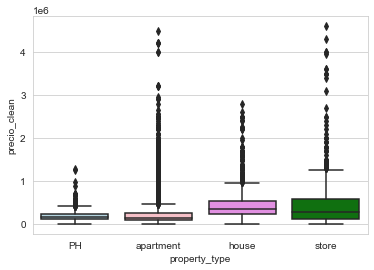

In [63]:
# precios sin valores mayores a 5 millones
mask_sinout_precio = geo_dataP_cabaSn.precio_clean < 5000000
data_pso = geo_dataP_cabaSn.loc[mask_sinout_precio&maskSinLux&mask_hp3,:]
fig= plt.plot( figsize=(10,7))
palette_tp=["lightblue", "lightpink", "violet", "green"]
sns.boxplot(x = "property_type", y = "precio_clean", data=data_pso,palette=palette_tp);


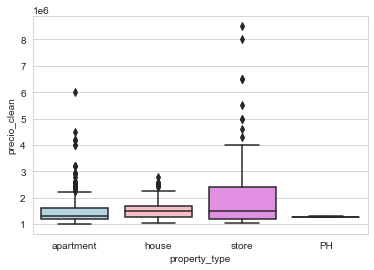

In [64]:
## precios con valores mayores entre 10 y 100 millones
mask_out_precio = (geo_dataP_cabaSn.precio_clean > 1000000) & (geo_dataP_cabaSn.precio_clean < 10000000)
data_pco = geo_dataP_cabaSn.loc[mask_out_precio&maskSinLux&mask_hp3,:]
fig= plt.plot( figsize=(10,7))
palette_tp=["lightblue", "lightpink", "violet", "green"]
sns.boxplot(x = "property_type", y = "precio_clean", data=data_pco,palette=palette_tp);

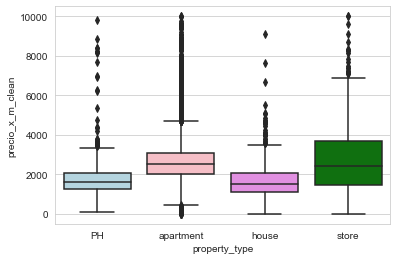

In [65]:
# precio_x_m_clean
data_pso = geo_dataP_cabaSn.loc[maskSinLux&mask_hp3,:]
fig= plt.plot( figsize=(10,7))
palette_tp=["lightblue", "lightpink", "violet", "green"]
sns.boxplot(x = "property_type", y = "precio_x_m_clean", data=data_pso,palette=palette_tp);

In [66]:
print ('Cant de casos Totales del dataset          ',geo_dataP_cabaSn.shape[0])
print ('Cant de casos posibles ouliers del dataset ',geo_dataP_cabaSn.loc[geo_dataP_cabaSn.precio_x_m_clean>4000].shape[0])

Cant de casos Totales del dataset           20630
Cant de casos posibles ouliers del dataset  1428


**Generamos la salida a csv con el producto de la limpieza para agregarle nuevas columnas**

In [67]:
# Armo el nuevo set de datos a procesar.
geo_dataP_cabaSn.shape
geo_dataP_cabaSn.to_csv('./data/datosPCABA.csv', sep=';')